## MNIST 학습하기

In [3]:
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


In [2]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

In [12]:
W1 = tf.Variable(tf.random_normal([784,256], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X, W1))

W2 = tf.Variable(tf.random_normal([256,256], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))

W3 = tf.Variable(tf.random_normal([256,10], stddev=0.01))
model = tf.matmul(L2, W3)

In [13]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

In [14]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [15]:
batch_size=100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(15):
    total_cost = 0
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        
        _, cost_val = sess.run([optimizer, cost],
                              feed_dict={X: batch_xs, Y: batch_ys})
        total_cost += cost_val
        
    print('Epoch:', '%04d' % (epoch +1),
         'Avg. cost =', '{:.3f}'.format(total_cost / total_batch))
    
print('최적화 완료!')

Epoch: 0001 Avg. cost = 0.404
Epoch: 0002 Avg. cost = 0.150
Epoch: 0003 Avg. cost = 0.097
Epoch: 0004 Avg. cost = 0.071
Epoch: 0005 Avg. cost = 0.054
Epoch: 0006 Avg. cost = 0.041
Epoch: 0007 Avg. cost = 0.032
Epoch: 0008 Avg. cost = 0.025
Epoch: 0009 Avg. cost = 0.019
Epoch: 0010 Avg. cost = 0.019
Epoch: 0011 Avg. cost = 0.014
Epoch: 0012 Avg. cost = 0.014
Epoch: 0013 Avg. cost = 0.015
Epoch: 0014 Avg. cost = 0.011
Epoch: 0015 Avg. cost = 0.013
최적화 완료!


In [10]:
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도:', sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))


정확도: 0.9779


In [20]:
print(W3)
print(model)
print(sess.run(model, feed_dict={X: mnist.test.images, Y: mnist.test.labels})[0])
print(is_correct)
print(sess.run(is_correct, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

<tf.Variable 'Variable_3:0' shape=(256, 10) dtype=float32_ref>
Tensor("MatMul_3:0", shape=(?, 10), dtype=float32)
[-10.786603   -9.123259   -1.3522425  -2.4779496 -23.588985  -15.304897
 -37.799465   16.402328   -4.6443844   0.8907549]
Tensor("Equal:0", shape=(?,), dtype=bool)
[ True  True  True ...  True  True  True]


## 6.2 Dropout method

In [6]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


In [7]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

keep_prob = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_normal([784,256], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X, W1))
L1 = tf.nn.dropout(L1, keep_prob)

W2 = tf.Variable(tf.random_normal([256,256], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))
L2 = tf.nn.dropout(L2, keep_prob)

W3 = tf.Variable(tf.random_normal([256,10], stddev=0.01))
model = tf.matmul(L2, W3)

In [8]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [9]:
batch_size=100
total_batch = int(mnist.train.num_examples / batch_size)

In [16]:
for epoch in range(30):
    total_cost = 0
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        
        _, cost_val = sess.run([optimizer, cost],
                              feed_dict={X: batch_xs, Y: batch_ys, keep_prob: 0.8})
        total_cost += cost_val
        
    print('Epoch:', '%04d' % (epoch +1),
         'Avg. cost =', '{:.3f}'.format(total_cost / total_batch))
    
print('최적화 완료!')

Epoch: 0001 Avg. cost = 0.010
Epoch: 0002 Avg. cost = 0.008
Epoch: 0003 Avg. cost = 0.007
Epoch: 0004 Avg. cost = 0.012
Epoch: 0005 Avg. cost = 0.008
Epoch: 0006 Avg. cost = 0.009
Epoch: 0007 Avg. cost = 0.007
Epoch: 0008 Avg. cost = 0.008
Epoch: 0009 Avg. cost = 0.006
Epoch: 0010 Avg. cost = 0.007
Epoch: 0011 Avg. cost = 0.007
Epoch: 0012 Avg. cost = 0.006
Epoch: 0013 Avg. cost = 0.006
Epoch: 0014 Avg. cost = 0.008
Epoch: 0015 Avg. cost = 0.005
Epoch: 0016 Avg. cost = 0.002
Epoch: 0017 Avg. cost = 0.013
Epoch: 0018 Avg. cost = 0.003
Epoch: 0019 Avg. cost = 0.006
Epoch: 0020 Avg. cost = 0.007
Epoch: 0021 Avg. cost = 0.003
Epoch: 0022 Avg. cost = 0.006
Epoch: 0023 Avg. cost = 0.008
Epoch: 0024 Avg. cost = 0.004
Epoch: 0025 Avg. cost = 0.005
Epoch: 0026 Avg. cost = 0.004
Epoch: 0027 Avg. cost = 0.004
Epoch: 0028 Avg. cost = 0.005
Epoch: 0029 Avg. cost = 0.006
Epoch: 0030 Avg. cost = 0.003
최적화 완료!


In [17]:
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도:', sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

정확도: 0.9809


## Matplotlib

In [21]:
import matplotlib.pyplot as plt

labels = sess.run(model, feed_dict={X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1})

fig = plt.figure()

for i in range(20):
    subplot = fig.add_subplot(4, 5, i+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(labels[i]))
    subplot.imshow(mnist.test.images[i].reshape((28,28)), cmap=plt.cm.gray_r)

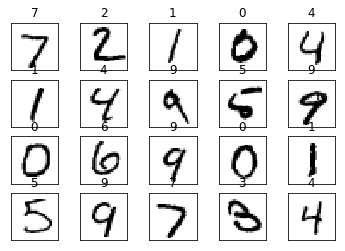

In [22]:
plt.show()